## Water supply watershed explorer - 2
Queries and maps the NC water supply watersheds and related data.

The data are served here: https://services.arcgis.com/iFBq2AW9XO0jYYF7/ArcGIS/rest/services/Drupal_Map

In [1]:
#Imports
import requests, io
import pandas as pd
import geopandas as gpd
from shapely.geometry import LinearRing
from shapely.geometry import Polygon

import matplotlib.pyplot as plt

%matplotlib inline

ImportError: No module named 'geopandas'

In [132]:
#Construct the query
serviceURL = 'https://services.arcgis.com/iFBq2AW9XO0jYYF7/ArcGIS/rest/services/Drupal_Map/FeatureServer/4/query'
params = dict(where='OBJECTID >= 0',
              geometryType='esriGeometryEnvelope',
              spatialRel='esriSpatialRelIntersects',
              resultType='none',
              distance='0.0',
              units='esriSRUnit_Meter',
              returnGeodetic='false',
              outFields='*',
              returnGeometry='true',
              returnCentroid='false',
              multipatchOption='xyFootprint',
              applyVCSProjection='false',
              returnIdsOnly='false',
              returnCountOnly='false',
              returnExtentOnly='false',
              returnDistinctValues='false',
              returnZ='false',
              returnM='false',
              returnExceededLimitFeatures='true',
              quantizationParameters='',
              sqlFormat='none',
              f='geojson')

theStr = 'where=OBJECTID+%3C+10&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=&returnGeometry=true&returnCentroid=false&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnDistinctValues=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=html&token='
theStr = theStr.replace("=&","=',\n              ")
theStr = theStr.replace("=","='")
theStr = theStr.replace("&","',\n              ")
theStr = "params = dict(" + theStr + "')"
print (theStr)

In [133]:
#Retrive the JSON and extract the features
r = requests.get(serviceURL,params)

features = r.json()['features']
print ("{} features extracted".format(len(features)))

121 features extracted


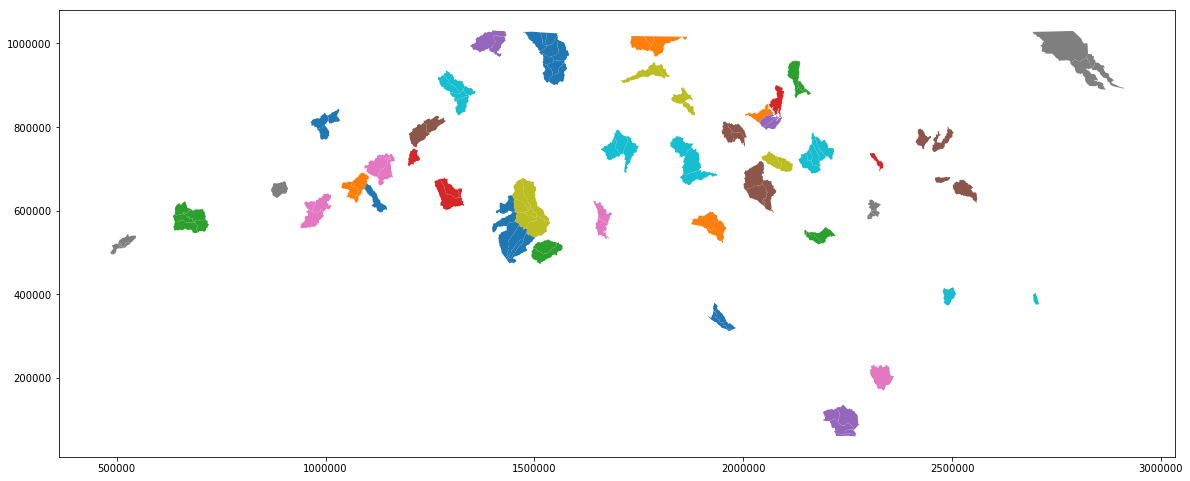

In [134]:
#Create a dataframe from the json objects
df = pd.DataFrame(features)

#Pull the attributes into its own dataframe
dfAttr = df['properties'].apply(pd.Series)

#Pull the geometry into its own dataframe & convert coords to polygons
dfGeom = df['geometry'].apply(pd.Series)
dfGeom['Shape'] = dfGeom.apply(lambda x: Polygon(x.coordinates[0]),axis=1)

#Insert the geometry into the attributes
dfAttr.insert(0,"geometry",dfGeom['Shape'])

#Convert the pandas dataFrame to a geopandas data frame
gdf=gpd.GeoDataFrame(dfAttr)

#Plot
gdf.plot('LWP_NAME',figsize=(20,10));

In [135]:
gdf.iloc[1]

geometry         POLYGON ((2693855.34007339 1027623.95108023, 2...
GlobalID                      24b323be-a5a7-4e1b-83d2-3f6b3c4d163d
HUCODE                                              03010205010020
HUCODE8                                                   03010205
LWP_ID                                                 LWP-2006-22
LWP_NAME                                          Pasquotank River
OBJECTID                                                         2
RIVBASIN_N                                              PASQUOTANK
TLW                                                            Yes
complete_date                                                 2003
Name: 1, dtype: object